In [123]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as sts
from pandas.testing import assert_frame_equal

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
pd.set_option('display.max_rows', 20)

In [124]:
vendas = pd.read_csv('Dados/vendas-limpo.csv')
devolvidos = pd.read_csv('Dados/pedidos-devolvidos.csv')

In [125]:
display(vendas.head(5))

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Horario,DataBR
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,16:14:00,30/03/2021
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,11:11:00,11/11/2021
2,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,12:08:00,06/04/2021
3,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,15:33:00,27/10/2021
4,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,08:38:00,16/11/2021


In [126]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19947 entries, 0 to 19946
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N° da fatura    19947 non-null  object 
 1   Data da fatura  19947 non-null  object 
 2   ID Cliente      18524 non-null  float64
 3   País            19947 non-null  object 
 4   Quantidade      19947 non-null  int64  
 5   Valor           19947 non-null  float64
 6   Horario         19947 non-null  object 
 7   DataBR          19947 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


In [127]:
# Convertendo a coluna 'Data da fatura' para o formato datetime64
vendas['Data da fatura'] = pd.to_datetime(vendas['Data da fatura'], format='%Y-%m-%d %H:%M:%S')

In [128]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19947 entries, 0 to 19946
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    19947 non-null  object        
 1   Data da fatura  19947 non-null  datetime64[ns]
 2   ID Cliente      18524 non-null  float64       
 3   País            19947 non-null  object        
 4   Quantidade      19947 non-null  int64         
 5   Valor           19947 non-null  float64       
 6   Horario         19947 non-null  object        
 7   DataBR          19947 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.2+ MB


In [129]:
vendas.describe()

,Data da fatura,ID Cliente,Quantidade,Valor
count,19947,18524.000000,19947.000000,19947.000000
mean,2021-06-29 09:00:23.937434112,15266.958486,279.426982,532.866706
min,2020-12-01 08:26:00,12346.000000,1.000000,0.380000
25%,2021-03-28 15:32:30,13777.000000,70.000000,152.180000
50%,2021-07-07 15:31:00,15179.000000,151.000000,303.680000
75%,2021-10-11 09:23:30,16779.000000,296.000000,494.955000
max,2021-12-09 12:50:00,18287.000000,80995.000000,168469.600000
std,NaN,1733.964226,954.533218,1774.821758


## Vendas

### Quantidade de vendas (faturas) por país

In [130]:
# Contando o número de faturas emitidas por país
faturas_por_pais = vendas.groupby('País')['N° da fatura'].nunique().sort_values(ascending=False).reset_index()

# Calculando a porcentagem de faturas por país
faturas_por_pais['Porcentagem %'] = (faturas_por_pais['N° da fatura'] / faturas_por_pais['N° da fatura'].sum()) * 100

# Limitando os valores da coluna 'Porcentagem' a 2 casas decimais
faturas_por_pais['Porcentagem %'] = faturas_por_pais['Porcentagem %'].round(2)

display(faturas_por_pais[['País', 'N° da fatura', 'Porcentagem %']].transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
País,United Kingdom,Germany,France,EIRE,Belgium,Netherlands,Spain,Portugal,Australia,Switzerland,Finland,Italy,Norway,Sweden,Channel Islands,Poland,Japan,Denmark,Austria,Cyprus,Hong Kong,Israel,Iceland,Singapore,Canada,Greece,USA,Malta,Lithuania,European Community,Bahrain,United Arab Emirates,Czech Republic,Lebanon,Brazil,Saudi Arabia,South Africa
N° da fatura,18019,457,392,288,98,94,90,58,57,54,41,38,36,36,26,19,19,18,17,16,11,8,7,7,6,5,5,5,4,4,3,3,2,1,1,1,1
Porcentagem %,90.33,2.29,1.97,1.44,0.49,0.47,0.45,0.29,0.29,0.27,0.21,0.19,0.18,0.18,0.13,0.1,0.1,0.09,0.09,0.08,0.06,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01


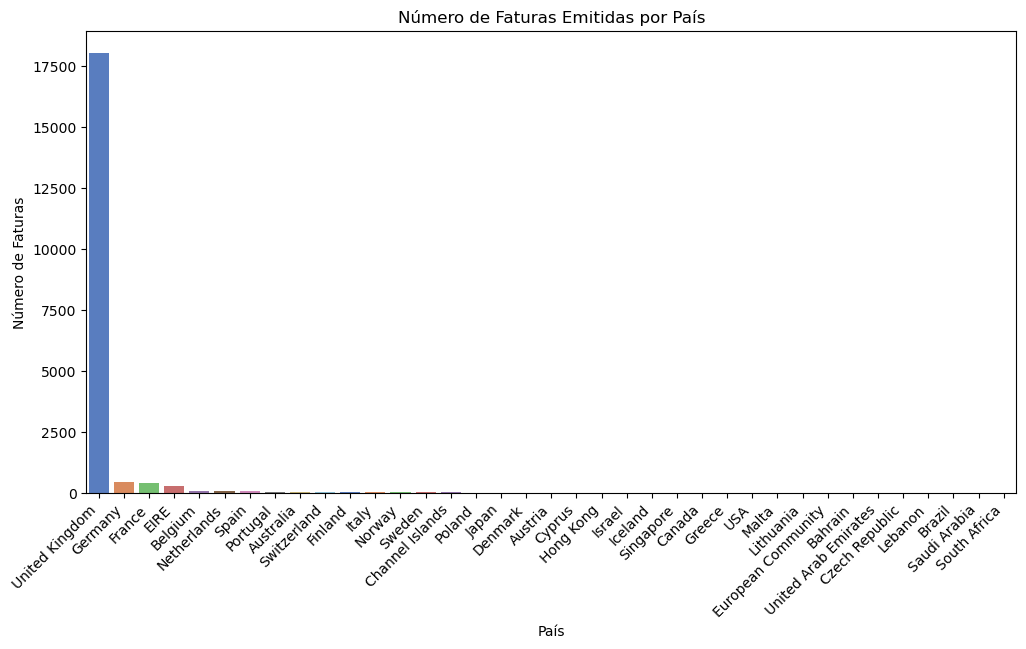

In [131]:
# Gráfico de barras com o total de faturas por país
plt.figure(figsize=(12, 6))
sns.barplot(x='País', y='N° da fatura', data=faturas_por_pais, palette='muted')
plt.title('Número de Faturas Emitidas por País')
plt.xlabel('País')
plt.ylabel('Número de Faturas')
plt.xticks(rotation=45, ha='right')
plt.show()

### Valor total das vendas por país

In [132]:
# Agrupando o DataFrame por país e somando os valores
valor_por_pais = vendas.groupby('País')['Valor'].sum().sort_values(ascending=False).reset_index()

# Calculando a porcentagem do valor por país
valor_por_pais['Porcentagem %'] = (valor_por_pais['Valor'] / valor_por_pais['Valor'].sum()) * 100

# Limitando os valores da coluna 'Porcentagem' a 2 casas decimais
valor_por_pais['Porcentagem %'] = valor_por_pais['Porcentagem %'].round(2)

display(valor_por_pais[['País', 'Valor', 'Porcentagem %']].transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
País,United Kingdom,Netherlands,EIRE,Germany,France,Australia,Spain,Switzerland,Belgium,Sweden,Japan,Norway,Portugal,Finland,Singapore,Channel Islands,Denmark,Italy,Hong Kong,Cyprus,Austria,Israel,Poland,Greece,Iceland,Canada,USA,Malta,United Arab Emirates,Lebanon,Lithuania,European Community,Brazil,South Africa,Czech Republic,Bahrain,Saudi Arabia
Valor,8993543.47,285446.34,283249.06,228867.14,208779.98,138521.31,61577.11,57089.9,41196.34,38378.33,37392.44,36165.44,33747.1,22546.08,21279.29,20450.44,18955.34,17483.24,15691.8,13590.38,10198.68,8135.26,7334.65,4760.52,4310.0,3666.38,3580.39,2725.59,1902.28,1693.88,1661.06,1300.25,1143.6,1002.31,826.74,754.14,145.92
Porcentagem %,84.61,2.69,2.66,2.15,1.96,1.3,0.58,0.54,0.39,0.36,0.35,0.34,0.32,0.21,0.2,0.19,0.18,0.16,0.15,0.13,0.1,0.08,0.07,0.04,0.04,0.03,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.0


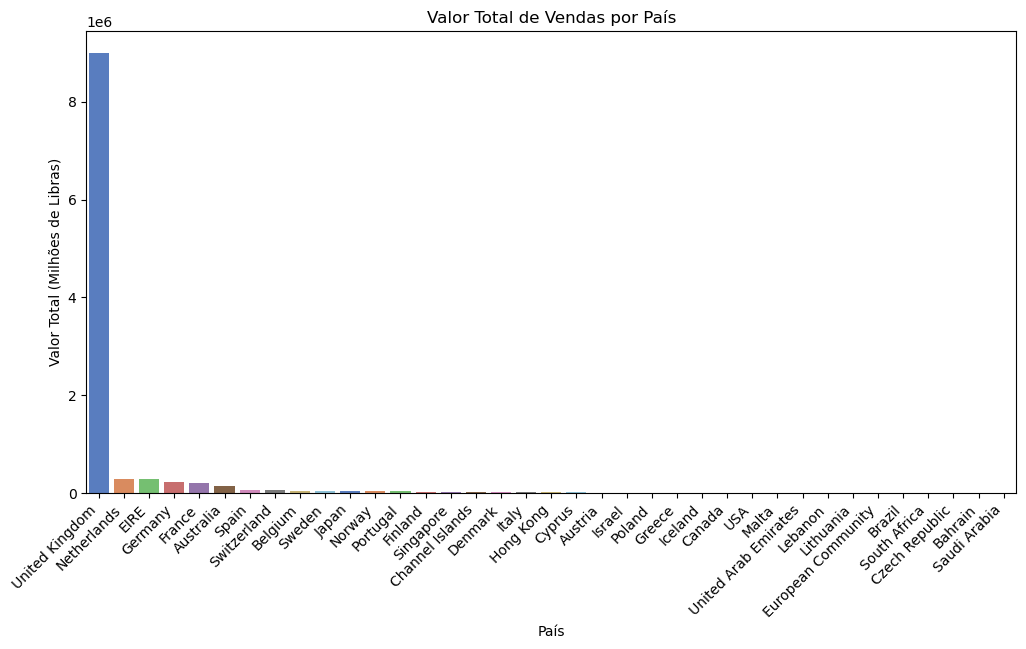

In [133]:
total_por_pais = vendas.groupby('País')['Valor'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='País', y='Valor', data=total_por_pais, palette='muted')
plt.title('Valor Total de Vendas por País')
plt.xlabel('País')
plt.ylabel('Valor Total (Milhões de Libras)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Valores mínimo, médio e máximo por fatura de cada país (ticket médio)

In [134]:
# Agrupando o DataFrame por país e calculando o valor mínimo, médio e máximo
estatisticas_por_pais = vendas.groupby('País')['Valor'].agg(['min', 'mean', 'max']).round(2).reset_index()

# Renomeando as colunas
estatisticas_por_pais.columns = ['País', 'Valor Mínimo', 'Valor Médio', 'Valor Máximo']

# Classificando a tabela a partir dos países com maior 'Valor Médio'
estatisticas_por_pais = estatisticas_por_pais.sort_values(by='Valor Médio', ascending=False).reset_index()

display((estatisticas_por_pais).transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
index,29,24,0,20,21,16,4,32,33,9,18,25,30,10,15,7,6,34,31,35,17,5,1,27,12,23,13,14,36,19,3,22,8,26,11,2,28
País,Singapore,Netherlands,Australia,Japan,Lebanon,Hong Kong,Brazil,Sweden,Switzerland,Denmark,Israel,Norway,South Africa,EIRE,Greece,Cyprus,Channel Islands,USA,Spain,United Arab Emirates,Iceland,Canada,Austria,Portugal,Finland,Malta,France,Germany,United Kingdom,Italy,Belgium,Lithuania,Czech Republic,Poland,European Community,Bahrain,Saudi Arabia
Valor Mínimo,999.26,2.08,61.2,15.3,1693.88,160.0,1143.6,8.5,4.95,168.9,15.7,4.5,1002.31,1.45,387.31,15.0,33.0,269.96,13.25,37.5,224.82,51.56,153.76,27.0,69.61,30.0,4.63,3.0,0.38,12.75,34.0,15.0,277.48,25.0,45.0,89.0,145.92
Valor Médio,3039.9,3036.66,2430.2,1968.02,1693.88,1426.53,1143.6,1066.06,1057.22,1053.07,1016.91,1004.6,1002.31,983.5,952.1,849.4,786.56,716.08,684.19,634.09,615.71,611.06,599.92,581.85,549.9,545.12,532.6,500.8,499.11,460.09,420.37,415.26,413.37,386.03,325.06,251.38,145.92
Valor Máximo,6068.06,20277.92,22775.93,5735.24,1693.88,2653.95,1143.6,5296.96,6207.67,3978.99,4873.81,4366.78,1002.31,16774.72,2661.24,2876.85,2060.03,1579.51,4146.34,975.54,1294.32,1217.64,1542.08,2271.62,2474.62,905.5,8895.76,9341.26,168469.6,1757.55,1491.59,1145.06,549.26,981.95,676.8,459.4,145.92


### Maiores mercados fora do Reino Unido (Ticket médio, Valor total e Qtd de faturas)

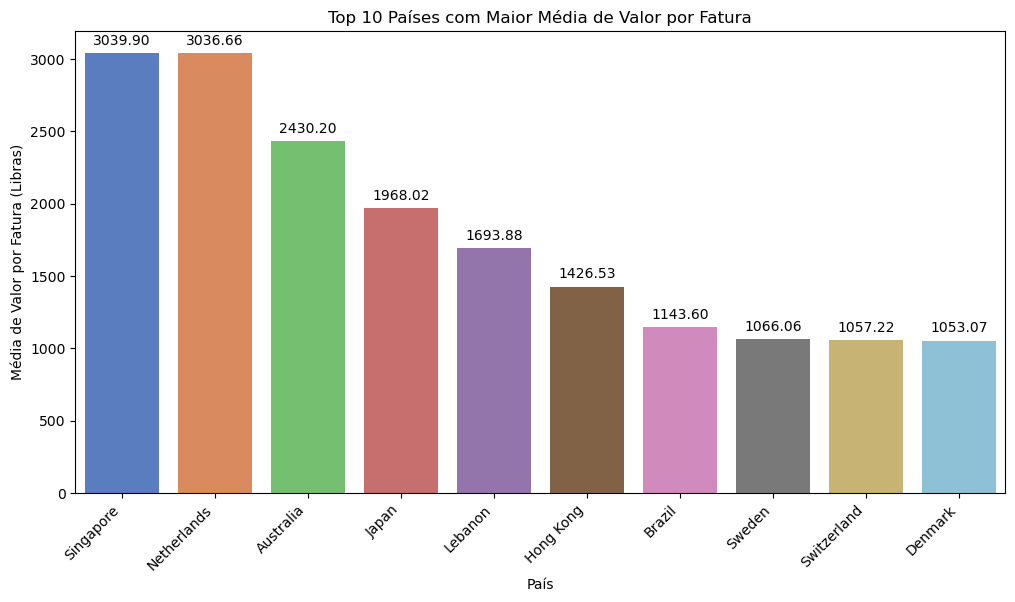

In [135]:
# Agrupando o DataFrame por país e calculando a média do valor por fatura
media_por_pais = vendas.groupby('País')['Valor'].mean().sort_values(ascending=False).head(10).reset_index()

# Criando um gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='País', y='Valor', data=media_por_pais, palette='muted')
plt.title('Top 10 Países com Maior Média de Valor por Fatura')
plt.xlabel('País')
plt.ylabel('Média de Valor por Fatura (Libras)')
plt.xticks(rotation=45, ha='right')

# Add valores no topo das barras usando o método 'annotate'
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),                      #Obtem a altura das barras c/ 2 casas decimais
                (p.get_x() + p.get_width() / 2., p.get_height()),   #Determina a posição do topo das barras
                ha = 'center', va = 'center',                       #Configura o alinhamento V e H dos rótulos
                xytext = (0, 9),                                    #Adiciona um deslocamento dos rótulos
                textcoords = 'offset points')                       #Define as coordenadas do deslocamento

plt.show()

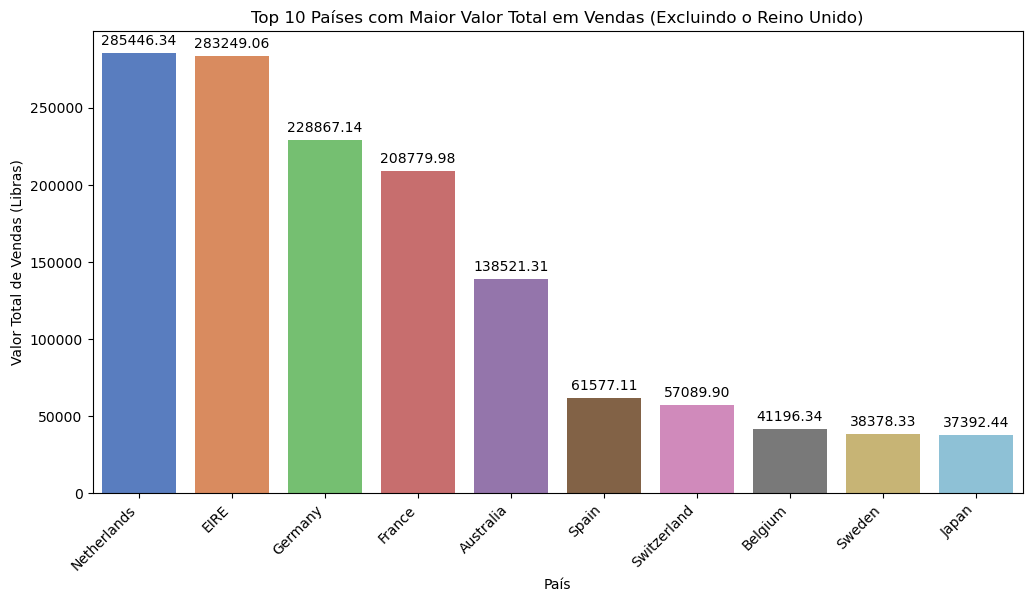

In [136]:
vendas_sem_uk = vendas[vendas['País'] != 'United Kingdom']

total_por_pais = vendas_sem_uk.groupby('País')['Valor'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='País', y='Valor', data=total_por_pais, palette='muted')
plt.title('Top 10 Países com Maior Valor Total em Vendas (Excluindo o Reino Unido)')
plt.xlabel('País')
plt.ylabel('Valor Total de Vendas (Libras)')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

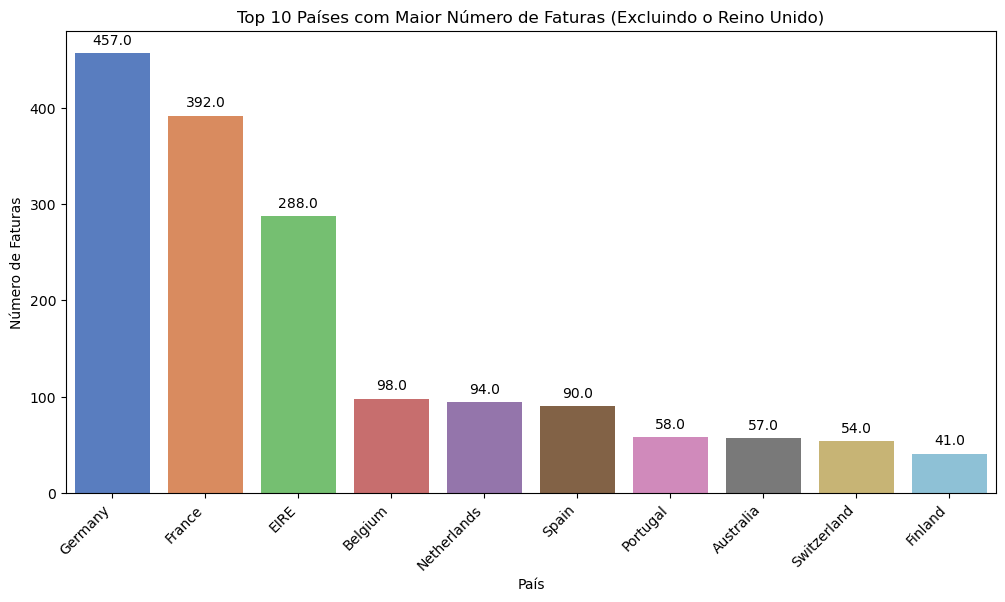

In [137]:
faturas_por_pais = vendas_sem_uk.groupby('País')['N° da fatura'].nunique().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='País', y='N° da fatura', data=faturas_por_pais, palette='muted')
plt.title('Top 10 Países com Maior Número de Faturas (Excluindo o Reino Unido)')
plt.xlabel('País')
plt.ylabel('Número de Faturas')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

### Menores mercados fora do Reino Unido (Ticket médio, Valor total e Qtd de faturas)

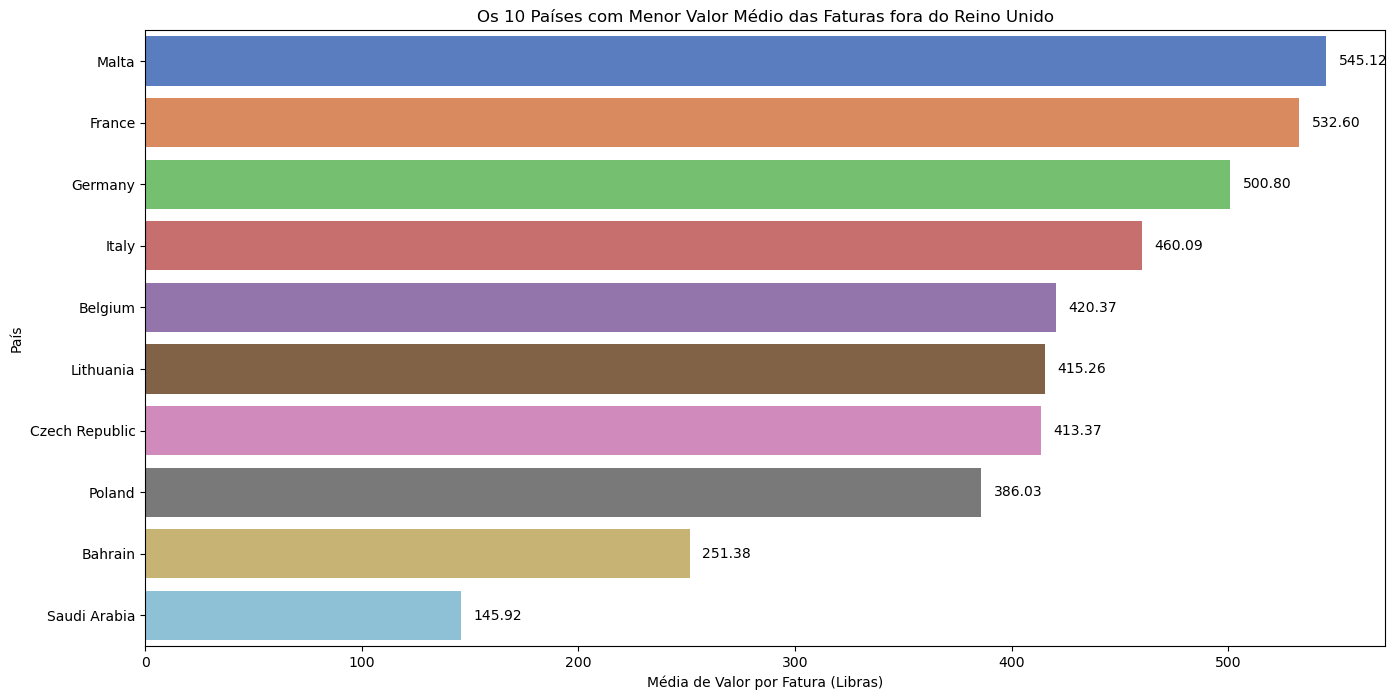

In [138]:
# Excluindo 'European Community' e 'United Kingdom' do DataFrame
vendas_filtradas = vendas[~vendas['País'].isin(['European Community', 'United Kingdom'])]

# Agrupando o DataFrame filtrado por país e calculando a média do valor por fatura
media_por_pais = vendas_filtradas.groupby('País')['Valor'].mean().sort_values(ascending=False).tail(10).reset_index()

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Valor', y='País', data=media_por_pais, palette='muted', orient='h')
plt.title('Os 10 Países com Menor Valor Médio das Faturas fora do Reino Unido')
plt.xlabel('Média de Valor por Fatura (Libras)')
plt.ylabel('País')

# Adicionando os valores no final das barras
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', xytext=(9, 0), textcoords='offset points')

plt.show()

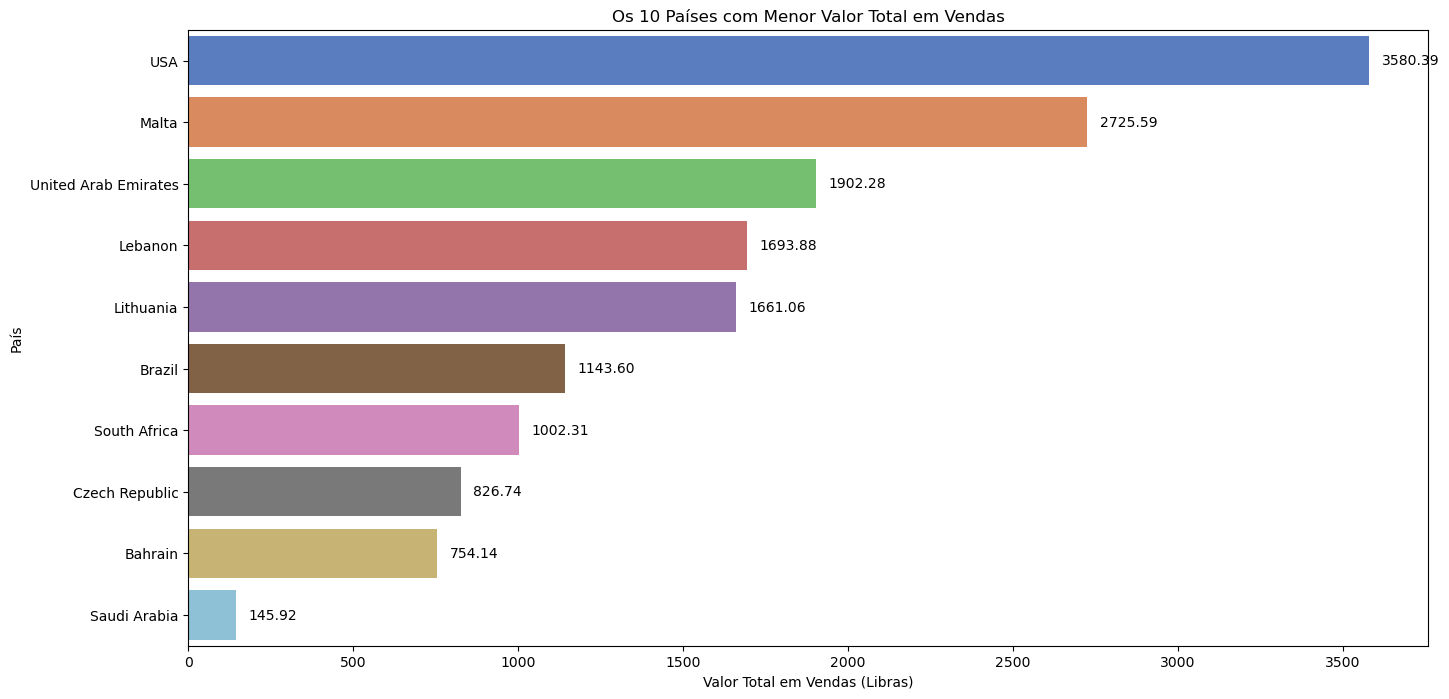

In [139]:
# Agrupando o DataFrame filtrado por país e calculando o valor total em vendas
total_por_pais = vendas_filtradas.groupby('País')['Valor'].sum().sort_values(ascending=False).tail(10).reset_index()

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Valor', y='País', data=total_por_pais, palette='muted', orient='h')
plt.title('Os 10 Países com Menor Valor Total em Vendas')
plt.xlabel('Valor Total em Vendas (Libras)')
plt.ylabel('País')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', xytext=(9, 0), textcoords='offset points')

plt.show()

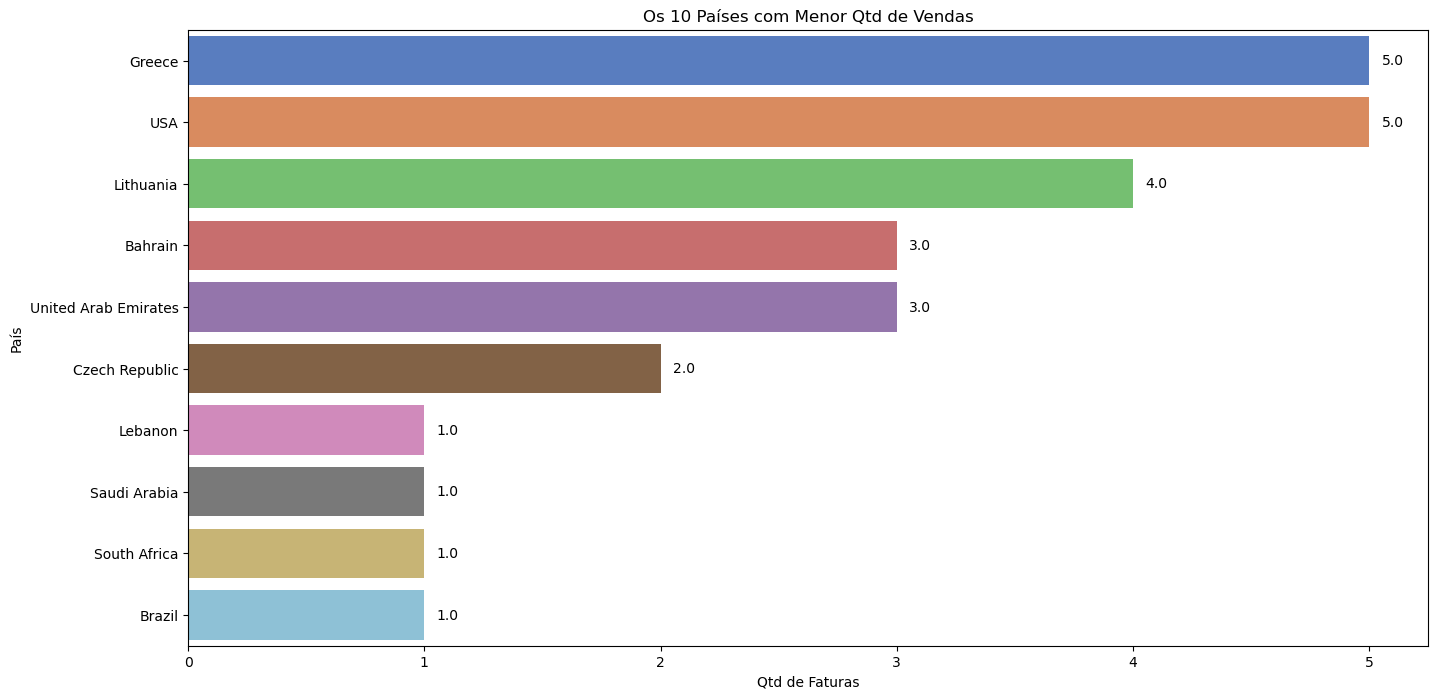

In [140]:
faturas_por_pais = vendas_filtradas.groupby('País')['N° da fatura'].nunique().sort_values(ascending=False).tail(10).reset_index()

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='N° da fatura', y='País', data=faturas_por_pais, palette='muted', orient='h')
plt.title('Os 10 Países com Menor Qtd de Vendas')
plt.xlabel('Qtd de Faturas')
plt.ylabel('País')

for p in ax.patches:
    ax.annotate(str(p.get_width()), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', xytext=(9, 0), textcoords='offset points')

plt.show()

## Período

### Características do mercados no período

In [141]:
# Encontrando a data inicial e final
data_inicial = vendas['Data da fatura'].min()
data_final = vendas['Data da fatura'].max()

print(f'Data Inicial: {data_inicial}')
print(f'Data Final: {data_final}')

Data Inicial: 2020-12-01 08:26:00
Data Final: 2021-12-09 12:50:00


In [142]:
# Criando uma nova coluna 'Mês' no DataFrame
vendas['Mês'] = vendas['Data da fatura'].dt.to_period('M')

# Agrupando por mês e calculando o total de vendas
total_vendas_por_mes = vendas.groupby('Mês')['Valor'].sum().reset_index()

print(total_vendas_por_mes)

        Mês       Valor
0   2020-12   823707.08
1   2021-01   688841.33
2   2021-02   520165.78
3   2021-03   700205.01
4   2021-04   535420.10
5   2021-05   767695.94
6   2021-06   761355.89
7   2021-07   717094.48
8   2021-08   758196.13
9   2021-09  1054854.02
10  2021-10  1154320.20
11  2021-11  1508443.54
12  2021-12   638792.68


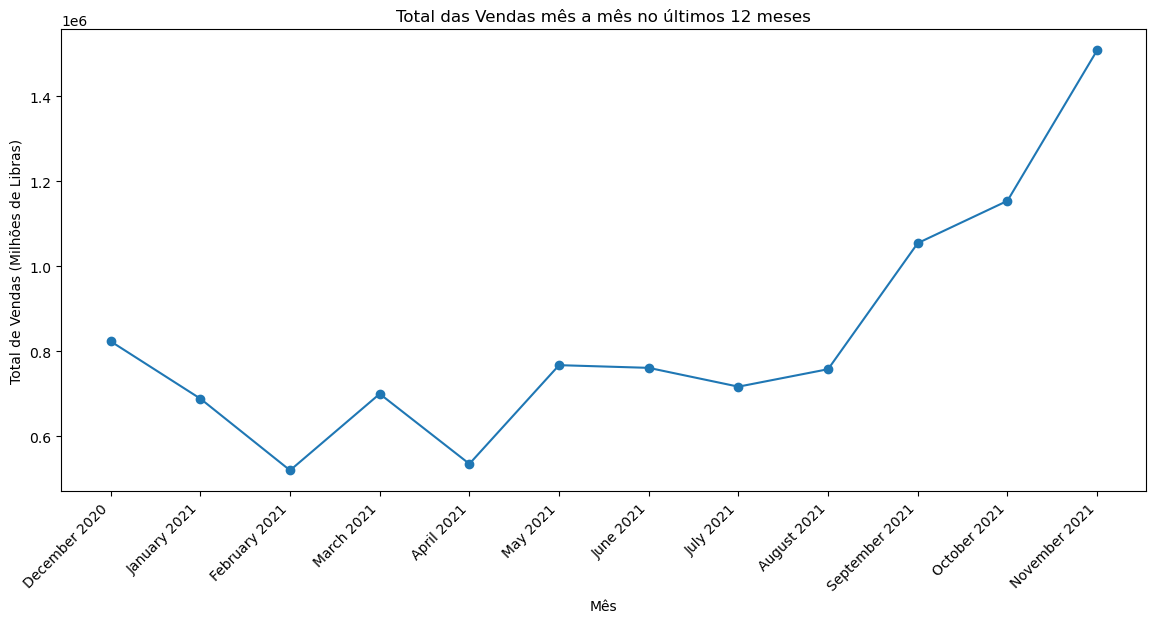

In [143]:
vendas['Mês e Ano'] = vendas['Data da fatura'].dt.to_period('M')

# Excluindo as vendas do último mês que não fechou(dezembro de 2021)
vendas = vendas[vendas['Mês e Ano'] != '2021-12']

# Agrupando por mês e calculando o total de vendas
total_vendas_por_mes_ano = vendas.groupby('Mês e Ano')['Valor'].sum().reset_index()

# Convertendo os períodos para strings contendo os nomes completos dos meses e anos
total_vendas_por_mes_ano['Mês'] = total_vendas_por_mes_ano['Mês e Ano'].dt.strftime('%B %Y')

# Criando um gráfico de linha
plt.figure(figsize=(14, 6))
plt.plot(total_vendas_por_mes_ano['Mês'], total_vendas_por_mes_ano['Valor'], marker='o', linestyle='-')
plt.title('Total das Vendas mês a mês no últimos 12 meses')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (Milhões de Libras)')
plt.xticks(rotation=45, ha='right')  # Ajustando a rotação dos rótulos do eixo X

plt.show()

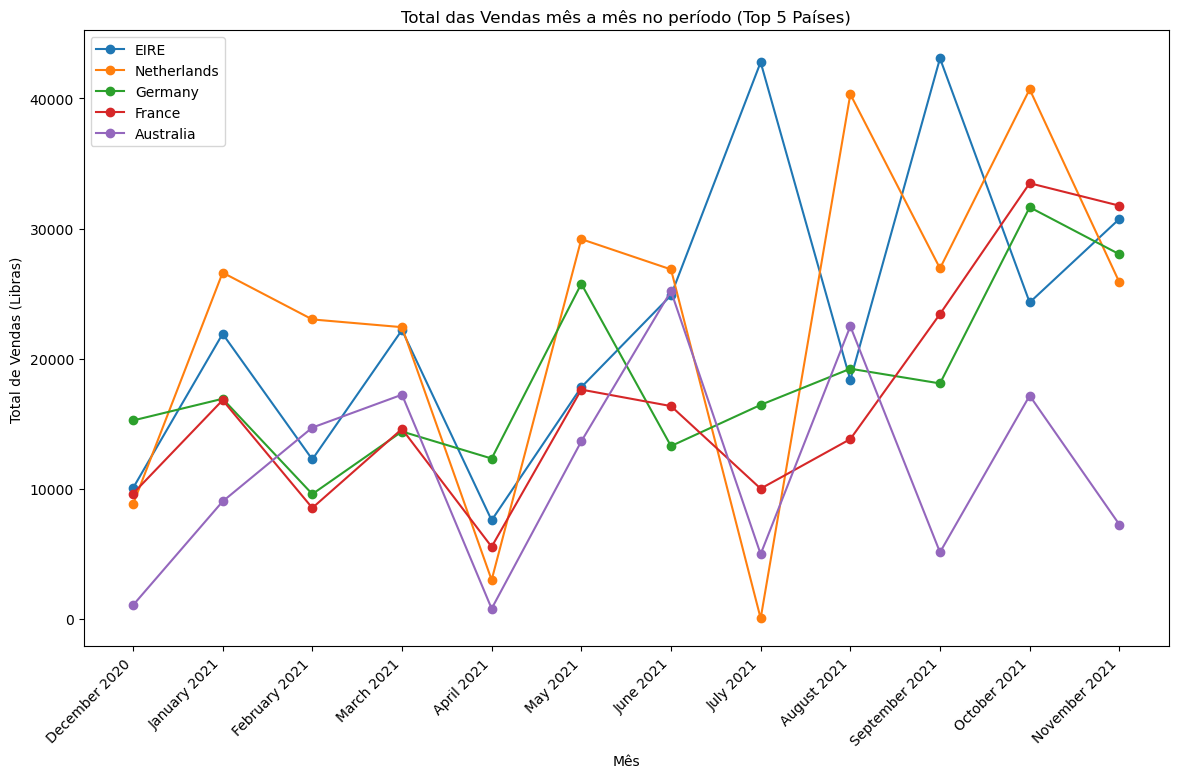

In [144]:
# Agrupando por país e mês, calculando o total de vendas para os 5 países que mais venderam (excluindo o 'United Kingdom')
top_paises = vendas[vendas['País'] != 'United Kingdom'].groupby(['País', 'Mês e Ano'])['Valor'].sum().reset_index()
top5_paises = top_paises.groupby('País')['Valor'].sum().sort_values(ascending=False).head(5).index

# Convertendo os períodos para strings contendo os nomes completos dos meses e anos
top_paises['Mês'] = top_paises['Mês e Ano'].dt.strftime('%B %Y')

# Criando um gráfico de linha para cada país através de um laço 'for'
plt.figure(figsize=(14, 8))
for pais in top5_paises:
    dados_pais = top_paises[top_paises['País'] == pais]
    plt.plot(dados_pais['Mês'], dados_pais['Valor'], marker='o', label=pais)

plt.title('Total das Vendas mês a mês no período (Top 5 Países)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (Libras)')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show()

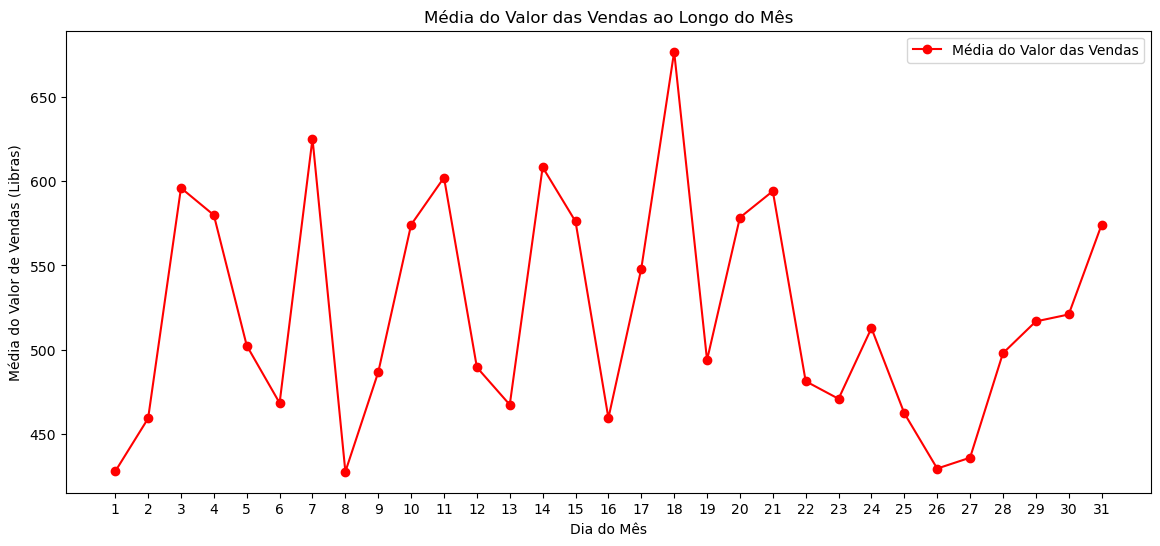

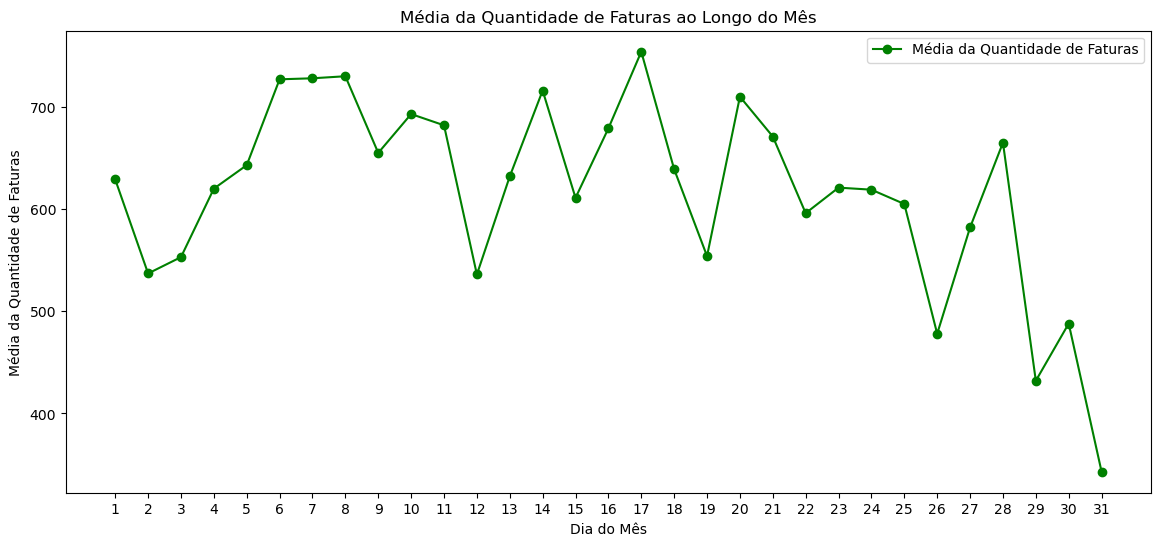

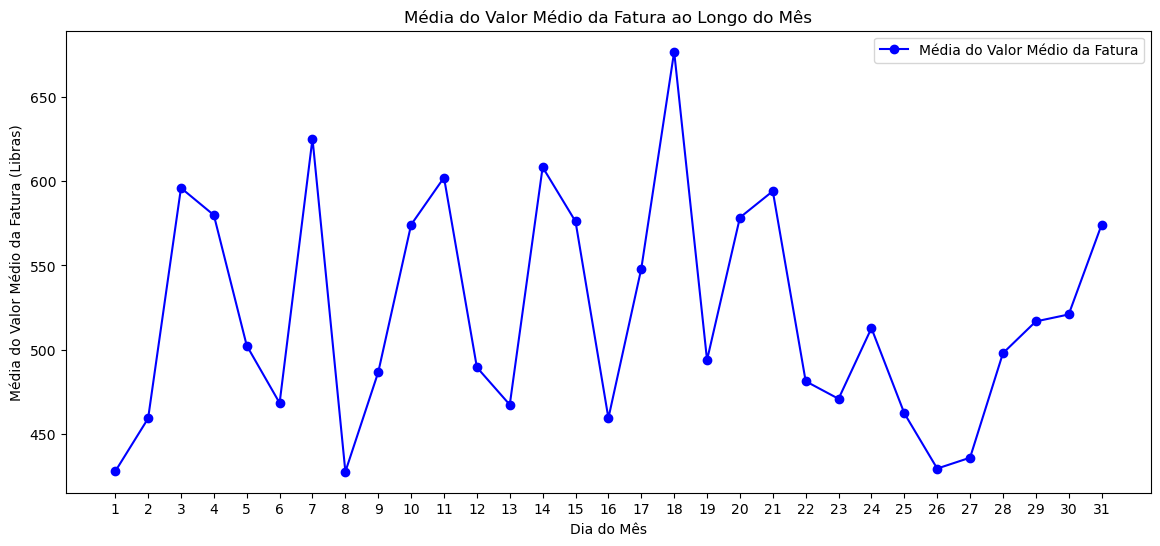

In [145]:
# Criando coluna 'Dia do Mês' para representar cada dia no DataFrame
vendas['Dia do Mês'] = vendas['Data da fatura'].dt.day

# Criando as medidas de média, faturas e valor por dia de cada mês
media_valor_vendas = vendas.groupby('Dia do Mês')['Valor'].mean()
media_quantidade_faturas = vendas.groupby('Dia do Mês')['N° da fatura'].nunique()
media_valor_medio_fatura = vendas.groupby('Dia do Mês')['Valor'].mean()

#Criando os 3 gráficos com as medidas de média, faturas e valor por dia de cada mês

# Gráfico da média do valor de vendas por dia do mês
plt.figure(figsize=(14, 6))
plt.plot(media_valor_vendas.index, media_valor_vendas.values, marker='o', label='Média do Valor das Vendas', color='red')
plt.title('Média do Valor das Vendas ao Longo do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Média do Valor de Vendas (Libras)')
plt.xticks(range(1, 32))  # Um ponto para cada dia do mês
plt.legend()
plt.show()

# Gráfico da média de quantidade de faturas por dia do mês
plt.figure(figsize=(14, 6))
plt.plot(media_quantidade_faturas.index, media_quantidade_faturas.values, marker='o', label='Média da Quantidade de Faturas', color='green')
plt.title('Média da Quantidade de Faturas ao Longo do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Média da Quantidade de Faturas')
plt.xticks(range(1, 32))
plt.legend()
plt.show()

# Gráfico da média do valor médio de cada fatura em cada dia do mês
plt.figure(figsize=(14, 6))
plt.plot(media_valor_medio_fatura.index, media_valor_medio_fatura.values, marker='o', label='Média do Valor Médio da Fatura', color='blue')
plt.title('Média do Valor Médio da Fatura ao Longo do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Média do Valor Médio da Fatura (Libras)')
plt.xticks(range(1, 32))
plt.legend()
plt.show()

## Devoluções

In [146]:
devolvidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N° da fatura    5174 non-null   object 
 1   Data da fatura  5174 non-null   object 
 2   ID Cliente      3654 non-null   float64
 3   País            5174 non-null   object 
 4   Quantidade      5174 non-null   int64  
 5   Valor           5174 non-null   float64
 6   Horario         5174 non-null   object 
 7   DataBR          5174 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 323.5+ KB


In [147]:
display(devolvidos.head(5))

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Horario,DataBR
0,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45,11:32:00,12/10/2021
1,C543628,2021-02-10 15:51:00,16558.0,United Kingdom,-5,-9.25,15:51:00,10/02/2021
2,542418,2021-01-27 17:39:00,NaN,United Kingdom,-17,0.00,17:39:00,27/01/2021
3,C553508,2021-05-17 13:44:00,14000.0,United Kingdom,-3,-1.95,13:44:00,17/05/2021
4,C577693,2021-11-21 11:48:00,12628.0,Germany,-3,-16.85,11:48:00,21/11/2021


In [148]:
devolvidos.describe()

,ID Cliente,Quantidade,Valor
count,3654.000000,5174.000000,5174.000000
mean,15097.853311,-93.646502,-177.604698
std,1721.290644,1572.241670,2763.531553
min,12346.000000,-80995.000000,-168469.600000
25%,13590.750000,-21.000000,-29.527500
50%,14923.500000,-5.000000,-10.065000
75%,16564.500000,-2.000000,0.000000
max,18282.000000,1.000000,0.000000


In [149]:
# Convertendo a coluna 'Data da fatura' para o tipo datetime
devolvidos['Data da fatura'] = pd.to_datetime(devolvidos['Data da fatura'], format='%Y-%m-%d %H:%M:%S')

# Excluindo a linha com o valor 'European Community' do DataFrame
devolvidos = devolvidos[devolvidos['País'] != 'European Community']

# Criando uma nova coluna 'País' para representar a quantidade de devoluções por país
quantidade_devolucoes = devolvidos.groupby('País')['N° da fatura'].count().reset_index()
quantidade_devolucoes.columns = ['País', 'Quantidade de Devoluções']

# Criando uma nova coluna 'Valor Total de Devoluções' por país
valor_total_devolucoes = devolvidos.groupby('País')['Valor'].sum().reset_index()
valor_total_devolucoes.columns = ['País', 'Valor Total de Devoluções']

# Calculando a porcentagem que cada país representa do total de devoluções
total_devolucoes = valor_total_devolucoes['Valor Total de Devoluções'].sum()
valor_total_devolucoes['Porcentagem do Total %'] = (valor_total_devolucoes['Valor Total de Devoluções'] / total_devolucoes) * 100

# Ordenando a tabela pelo valor total de devoluções em ordem decrescente
valor_total_devolucoes = valor_total_devolucoes.sort_values(by='Valor Total de Devoluções', ascending=True)

display((valor_total_devolucoes).transpose())


,28,8,10,23,11,24,13,21,16,27,25,0,19,18,26,5,15,4,3,14,17,9,2,7,20,6,12,1,22
País,United Kingdom,EIRE,France,Singapore,Germany,Spain,Hong Kong,Portugal,Japan,USA,Sweden,Australia,Norway,Netherlands,Switzerland,Cyprus,Italy,Channel Islands,Belgium,Israel,Malta,Finland,Bahrain,Denmark,Poland,Czech Republic,Greece,Austria,Saudi Arabia
Valor Total de Devoluções,-837405.82,-20177.14,-12311.21,-12158.9,-7168.93,-6802.53,-5574.76,-4380.08,-2075.75,-1849.47,-1782.42,-1444.04,-1001.98,-784.8,-704.55,-644.09,-592.73,-364.15,-285.38,-227.44,-220.12,-219.34,-205.74,-187.2,-121.51,-119.02,-50.0,-44.36,-14.75
Porcentagem do Total %,91.129527,2.195749,1.33975,1.323175,0.780149,0.740276,0.606666,0.476656,0.225891,0.201266,0.193969,0.157146,0.109039,0.085405,0.076672,0.070092,0.064503,0.039628,0.031056,0.024751,0.023954,0.023869,0.022389,0.020372,0.013223,0.012952,0.005441,0.004827,0.001605


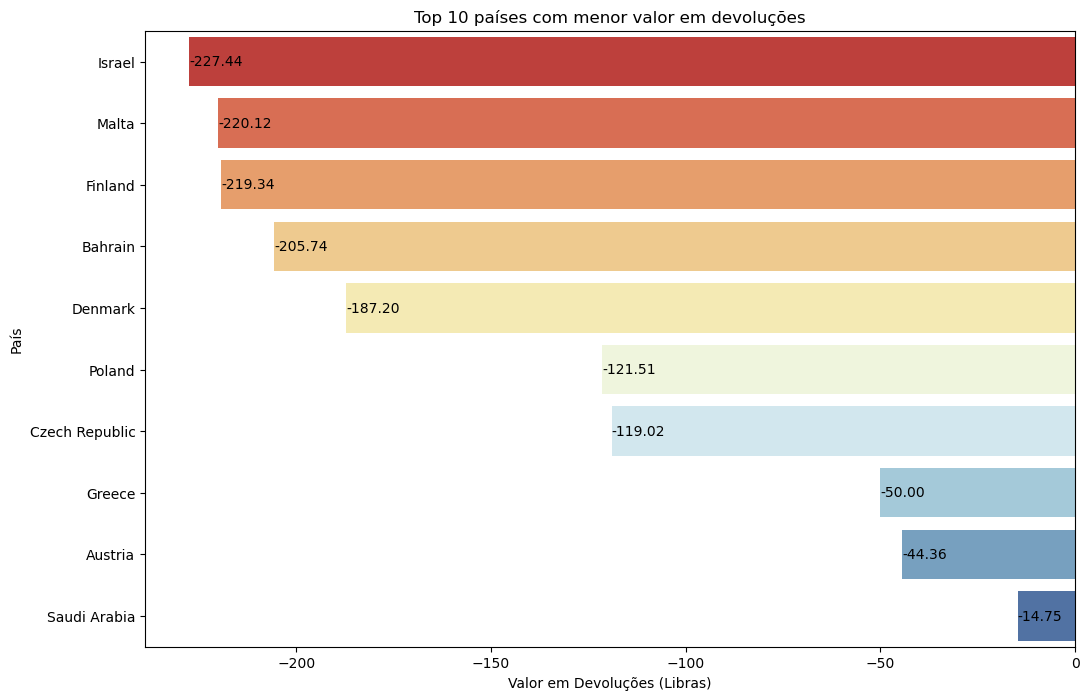

In [150]:
# Selecionando os 10 países com menor número de devoluções
top_paises_devolucoes = devolvidos.groupby('País')['Valor'].sum().sort_values(ascending=True).tail(10).reset_index()

# Criando um gráfico de barras horizontais com escala de cor
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Valor', y='País', data=top_paises_devolucoes, palette='RdYlBu', orient='h')

# Adicionando legendas nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

# Adicionando rótulos e título
plt.title('Top 10 países com menor valor em devoluções')
plt.xlabel('Valor em Devoluções (Libras)')
plt.ylabel('País')

plt.show()

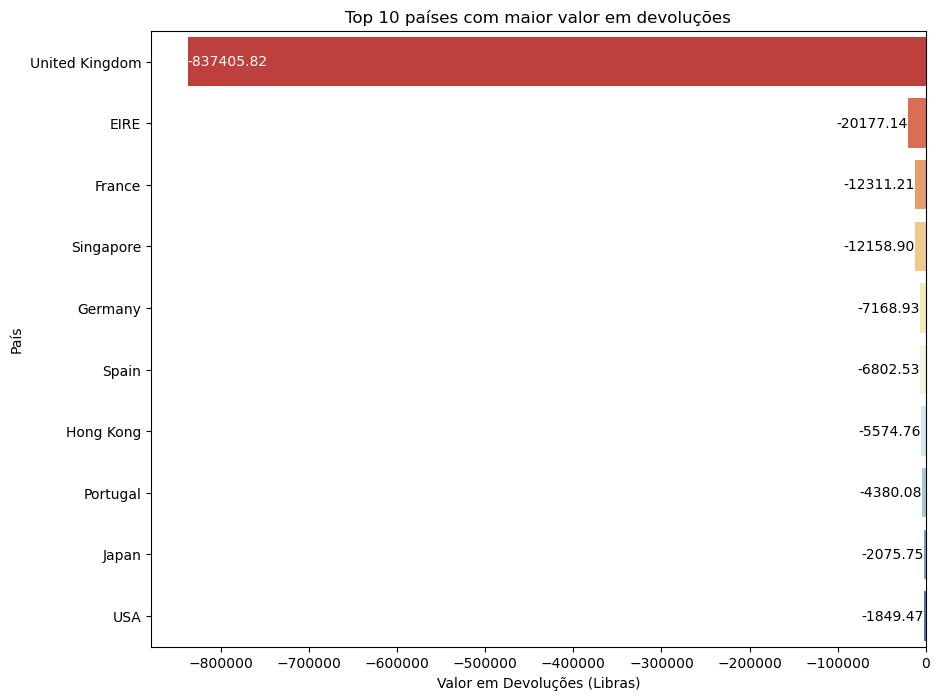

In [151]:
# Selecionando os 10 países com maior número de devoluções
top_paises_devolucoes = devolvidos.groupby('País')['Valor'].sum().sort_values(ascending=True).head(10).reset_index()

# Criando um gráfico de barras verticais com escala de cor
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Valor', y='País', data=top_paises_devolucoes, palette='RdYlBu', orient='h')

# Adicionando as legendas nas barras    
for i, p in enumerate(ax.patches):
    width = p.get_width()
    if i == 0:
        # Mudando o posicionamento e a cor da legenda da primeira barra
        plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center', color='white')
    else:
        # Adiciona a legenda para as demais barras posicionada do lado de fora da barra
        plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='right', va='center')

plt.title('Top 10 países com maior valor em devoluções')
plt.xlabel('Valor em Devoluções (Libras)')
plt.ylabel('País')

plt.show()

In [152]:
# Verificando as estruturas atuais dos Dataframes
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19128 entries, 0 to 19946
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    19128 non-null  object        
 1   Data da fatura  19128 non-null  datetime64[ns]
 2   ID Cliente      17746 non-null  float64       
 3   País            19128 non-null  object        
 4   Quantidade      19128 non-null  int64         
 5   Valor           19128 non-null  float64       
 6   Horario         19128 non-null  object        
 7   DataBR          19128 non-null  object        
 8   Mês             19128 non-null  period[M]     
 9   Mês e Ano       19128 non-null  period[M]     
 10  Dia do Mês      19128 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4), period[M](2)
memory usage: 1.7+ MB


In [153]:
devolvidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5173 entries, 0 to 5173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    5173 non-null   object        
 1   Data da fatura  5173 non-null   datetime64[ns]
 2   ID Cliente      3653 non-null   float64       
 3   País            5173 non-null   object        
 4   Quantidade      5173 non-null   int64         
 5   Valor           5173 non-null   float64       
 6   Horario         5173 non-null   object        
 7   DataBR          5173 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 363.7+ KB


### Relação entre o Total de Vendas e o Total de Devoluções

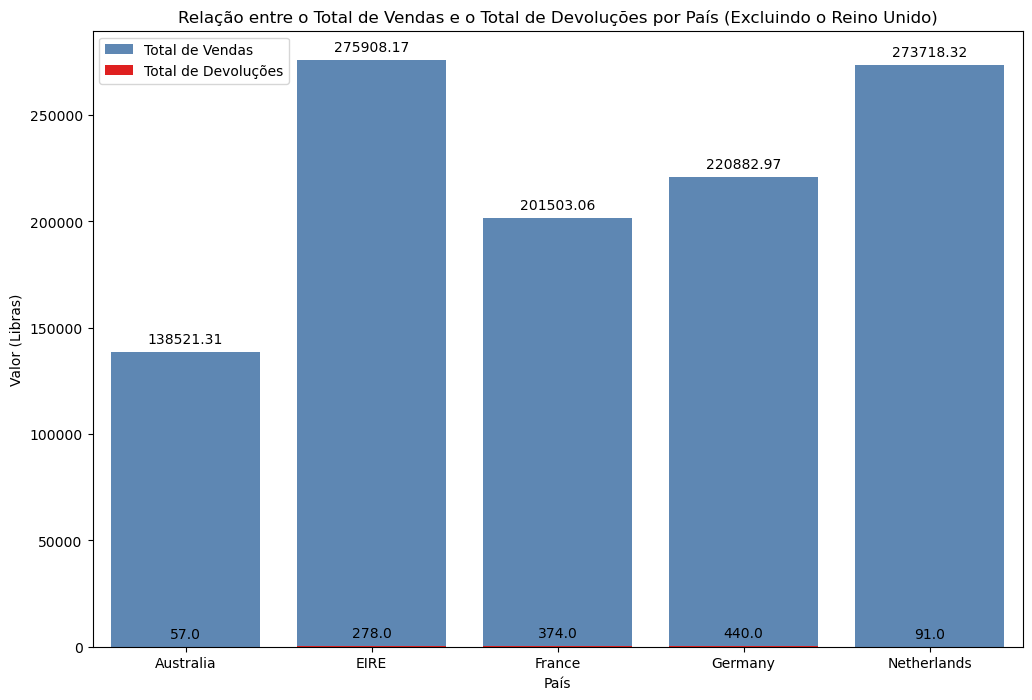

In [154]:
# Excluindo 'United Kingdom' dos cálculos
vendas_sem_uk = vendas[vendas['País'] != 'United Kingdom']

# Selecionando os cinco países com maior total de vendas
top_paises_vendas = vendas_sem_uk.groupby('País')['Valor'].sum().sort_values(ascending=False).head(5).index

# Filtrando as vendas apenas para esses países
vendas_top_paises = vendas_sem_uk[vendas_sem_uk['País'].isin(top_paises_vendas)]

# Agrupando os dados por país e calculando o total de vendas e devoluções
agregado_paises = vendas_top_paises.groupby('País')['Valor'].agg(['sum', 'count']).reset_index()
agregado_paises.columns = ['País', 'Total de Vendas', 'Total de Devoluções']

# Criando um gráfico de barras verticais
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='País', y='Total de Vendas', data=agregado_paises, color='#5086c1', label='Total de Vendas')
ax = sns.barplot(x='País', y='Total de Devoluções', data=agregado_paises, color='red', label='Total de Devoluções')

# Adicionando rótulos e título
plt.title('Relação entre o Total de Vendas e o Total de Devoluções por País (Excluindo o Reino Unido)')
plt.xlabel('País')
plt.ylabel('Valor (Libras)')
plt.legend()

# Adicionando os valores no topo das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()